## Github Setup
If not already present this clones the repo into google colab so that I may work on it with a bash environment.

In [0]:
!git config --global user.name "Richard Boyne"
!git config --global user.email "boynerichard@yahoo.co.uk"

In [3]:
from getpass import getpass
import os

if not os.path.isdir(".git"):
    user = "Boyne272"
    password = getpass('github password')
    os.environ['GITHUB_AUTH'] = user + ':' + password

    # clone the repo
    !git clone https://$GITHUB_AUTH@github.com/msc-acse/acse-9-independent-research-project-Boyne272.git repo

    # move the repo up one
    !mv repo/.git .
    !git checkout kmeans
    !git reset --hard
    
if os.path.isdir("sample_data"):
    !rm -r sample_data/
    
if os.path.isdir("repo"):    
    !rm -r repo
    
!ls -la

github password··········
Cloning into 'repo'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 62 (delta 27), reused 38 (delta 14), pack-reused 0
Unpacking objects: 100% (62/62), done.
D	Peliminary Report Richard Boyne.pdf
D	README.md
D	images/TX1_polarised_cropped.tif
D	images/TX1_white_cropped.tif
Branch 'kmeans' set up to track remote branch 'kmeans' from 'origin'.
Switched to a new branch 'kmeans'
HEAD is now at a27c8cb Added distance metric base class
total 8464
drwxr-xr-x 1 root root    4096 Jul 11 11:55  .
drwxr-xr-x 1 root root    4096 Jul 11 11:50  ..
drwxr-xr-x 1 root root    4096 Jul  3 16:14  .config
drwxr-xr-x 8 root root    4096 Jul 11 11:55  .git
-rw-r--r-- 1 root root      45 Jul 11 11:55  .gitignore
drwxr-xr-x 2 root root    4096 Jul 11 11:55  images
-rw-r--r-- 1 root root    3336 Jul 11 11:55  kmeans_basic.py
-rw-r--r-- 1 root root    4876 Jul 11 11:55  kmeans_img.py


## Imports
Some python magic functions for convenience and some basic packages that are often used 

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
    
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from tools import set_seed, get_img, progress_bar

## First simple 2d kmeans

Progress |##############################################    |

[Text(0.5, 1.0, '10 iterations')]

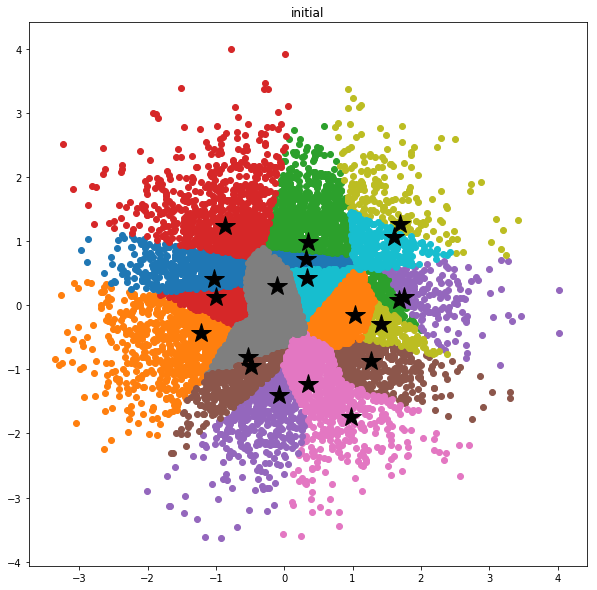

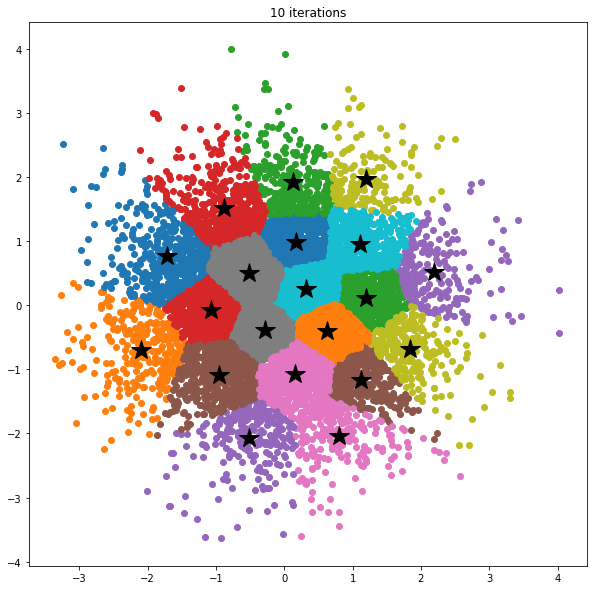

In [5]:
from kmeans_basic import kmeans

# generate random 2d data
N = 10000
x = torch.randn(N, 2, dtype=torch.float64)

# create the kmeans object
obj = kmeans(x, 20)
obj.update_clusters()
obj.plot().set(title='initial')

obj.iterate(10)
obj.plot().set(title="10 iterations")


## Image kmeans with no locality restriction

Progress |##############################################    |  104.934743 s


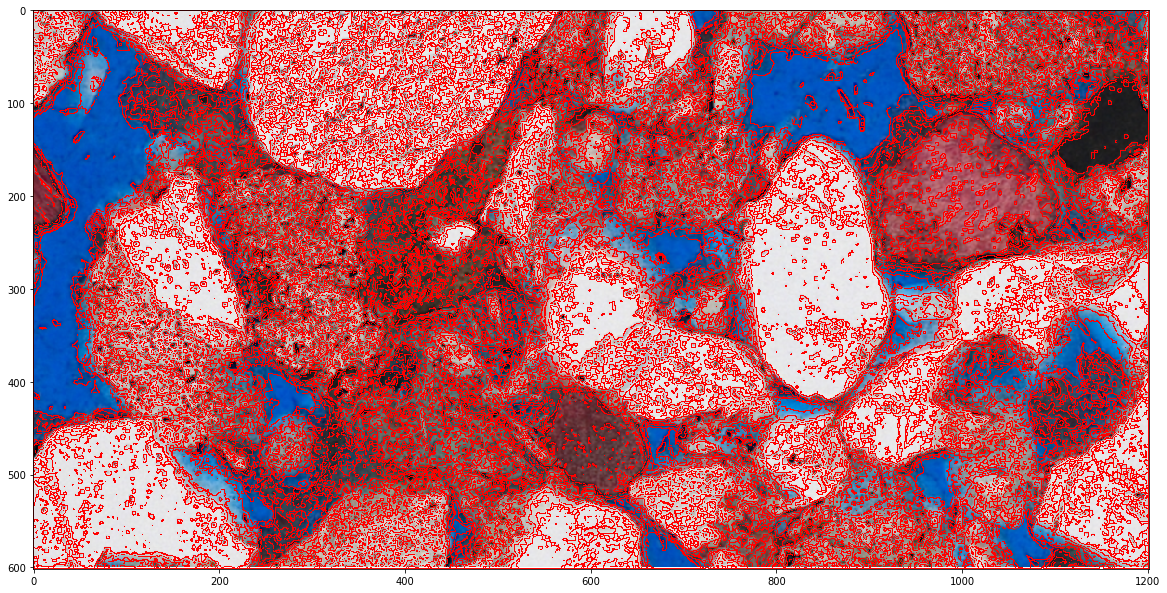

In [6]:
def dat_distance_metric(cent, vecs, factor=1/(600*1200)):
    color    = (cent[2:]-vecs[:, 2:]).norm(dim=1)
    position = (cent[:2]-vecs[:, :2]).norm(dim=1)
    return color + factor*position

from kmeans_img import kmeans_img 
set_seed(10)

img = get_img("images/TX1_white_cropped.tif")
obj = kmeans_img(img, 20, dist_func=dat_distance_metric)
obj.iterate(10)

mask = obj.get_mask(edge=True, rgba=True)
fig, ax = plt.subplots(figsize=[20, 20])
ax.imshow(img)
ax.imshow(mask)
    

## Image Kmeans with locality restriction by binning 

Progress |###################################################| 53.4867 s

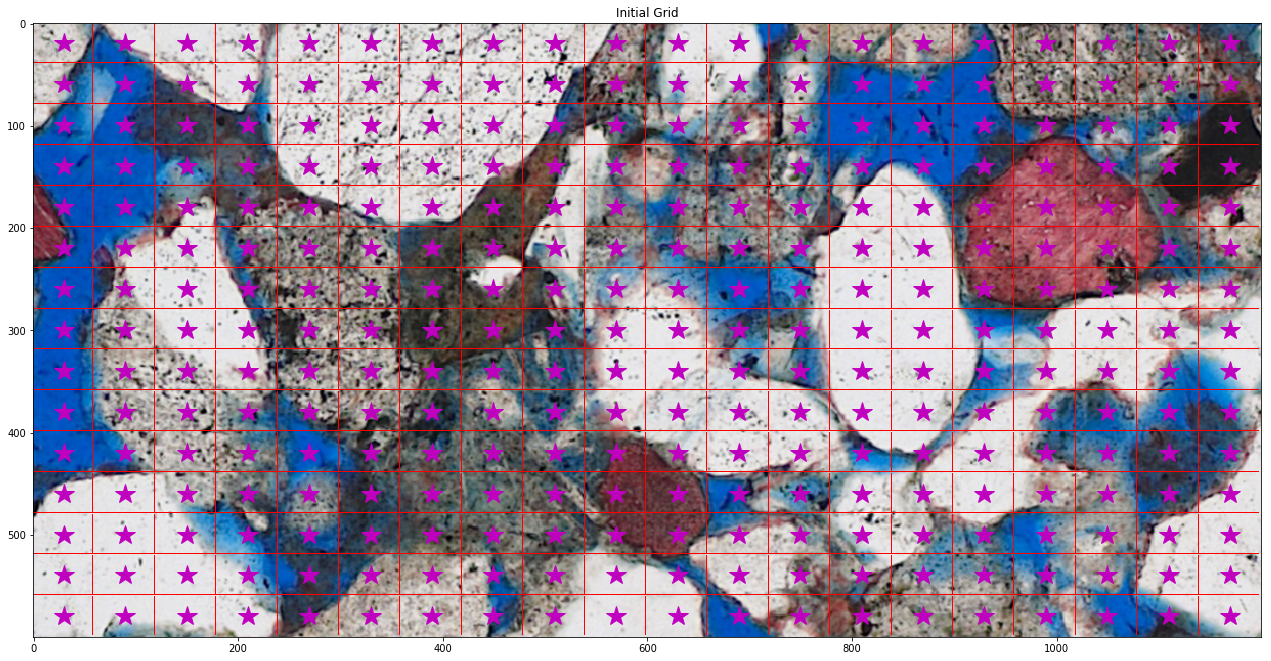

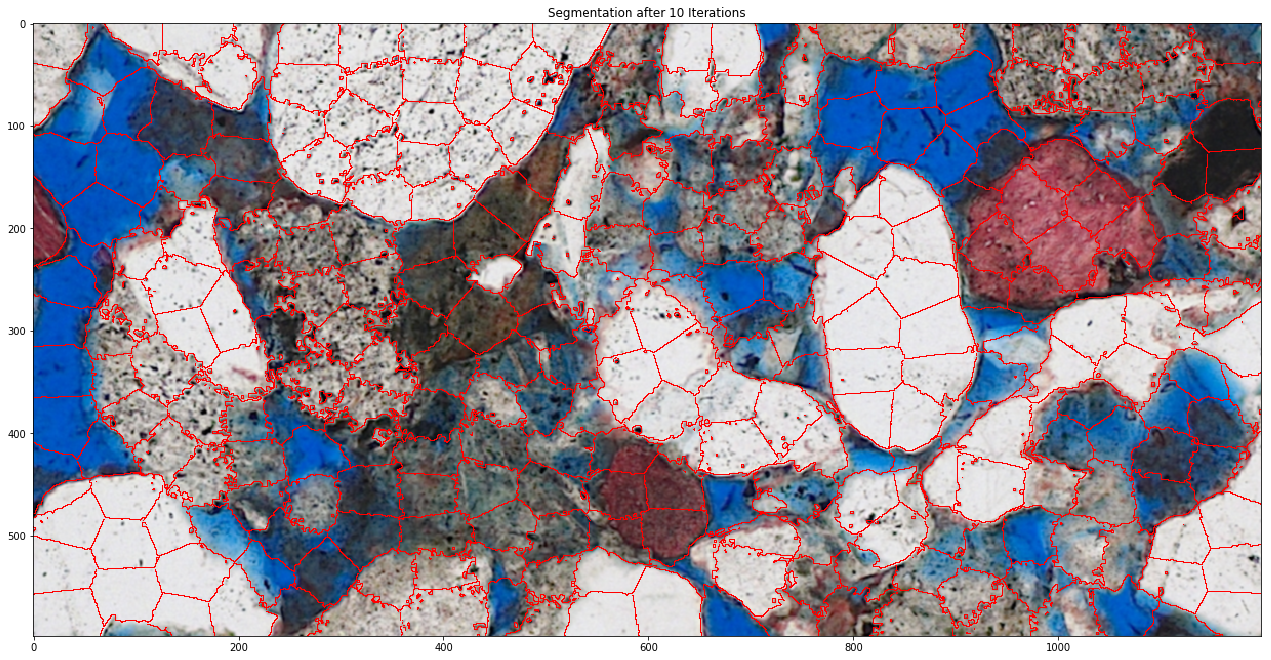

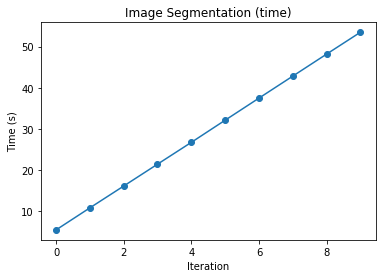

In [7]:
from kmeans_local import kmeans_local

# setup
set_seed(10)
img = get_img("images/TX1_white_cropped.tif")
obj = kmeans_local(img, [20,15])

# plot the initial binning 
fig, ax = plt.subplots(figsize=[22,22])
obj.plot("bins", ax=ax)
obj.plot("centers", ax=ax)
ax.set(title='Initial Grid')

# iterate
obj.iterate(10)

# plot the resulting segmentation
fig, ax = plt.subplots(figsize=[22, 22])
obj.plot('default', ax=ax)
ax.set(title='Segmentation after 10 Iterations')

# plot the time taken
obj.plot('time')